In [17]:
# Imports and setup
import sys
from pathlib import Path
from collections import Counter, defaultdict

import matplotlib.pyplot as plt

REPO_ROOT = Path('..').resolve()
if str(REPO_ROOT) not in sys.path:
    sys.path.append(str(REPO_ROOT))

from utils.data_processing import DataProcessor, SWITCH_TOKEN, TERMINATION_TOKEN

plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['figure.dpi'] = 300


In [18]:
# Load and process the data
data_path = REPO_ROOT / 'data' / 'data.xlsx'

dp = DataProcessor()
dp.load_excel(str(data_path))
sessions = dp.sessions

print(f"Data loaded: {len(sessions)} sessions from {data_path.name}")


Data loaded: 1108 sessions from data.xlsx


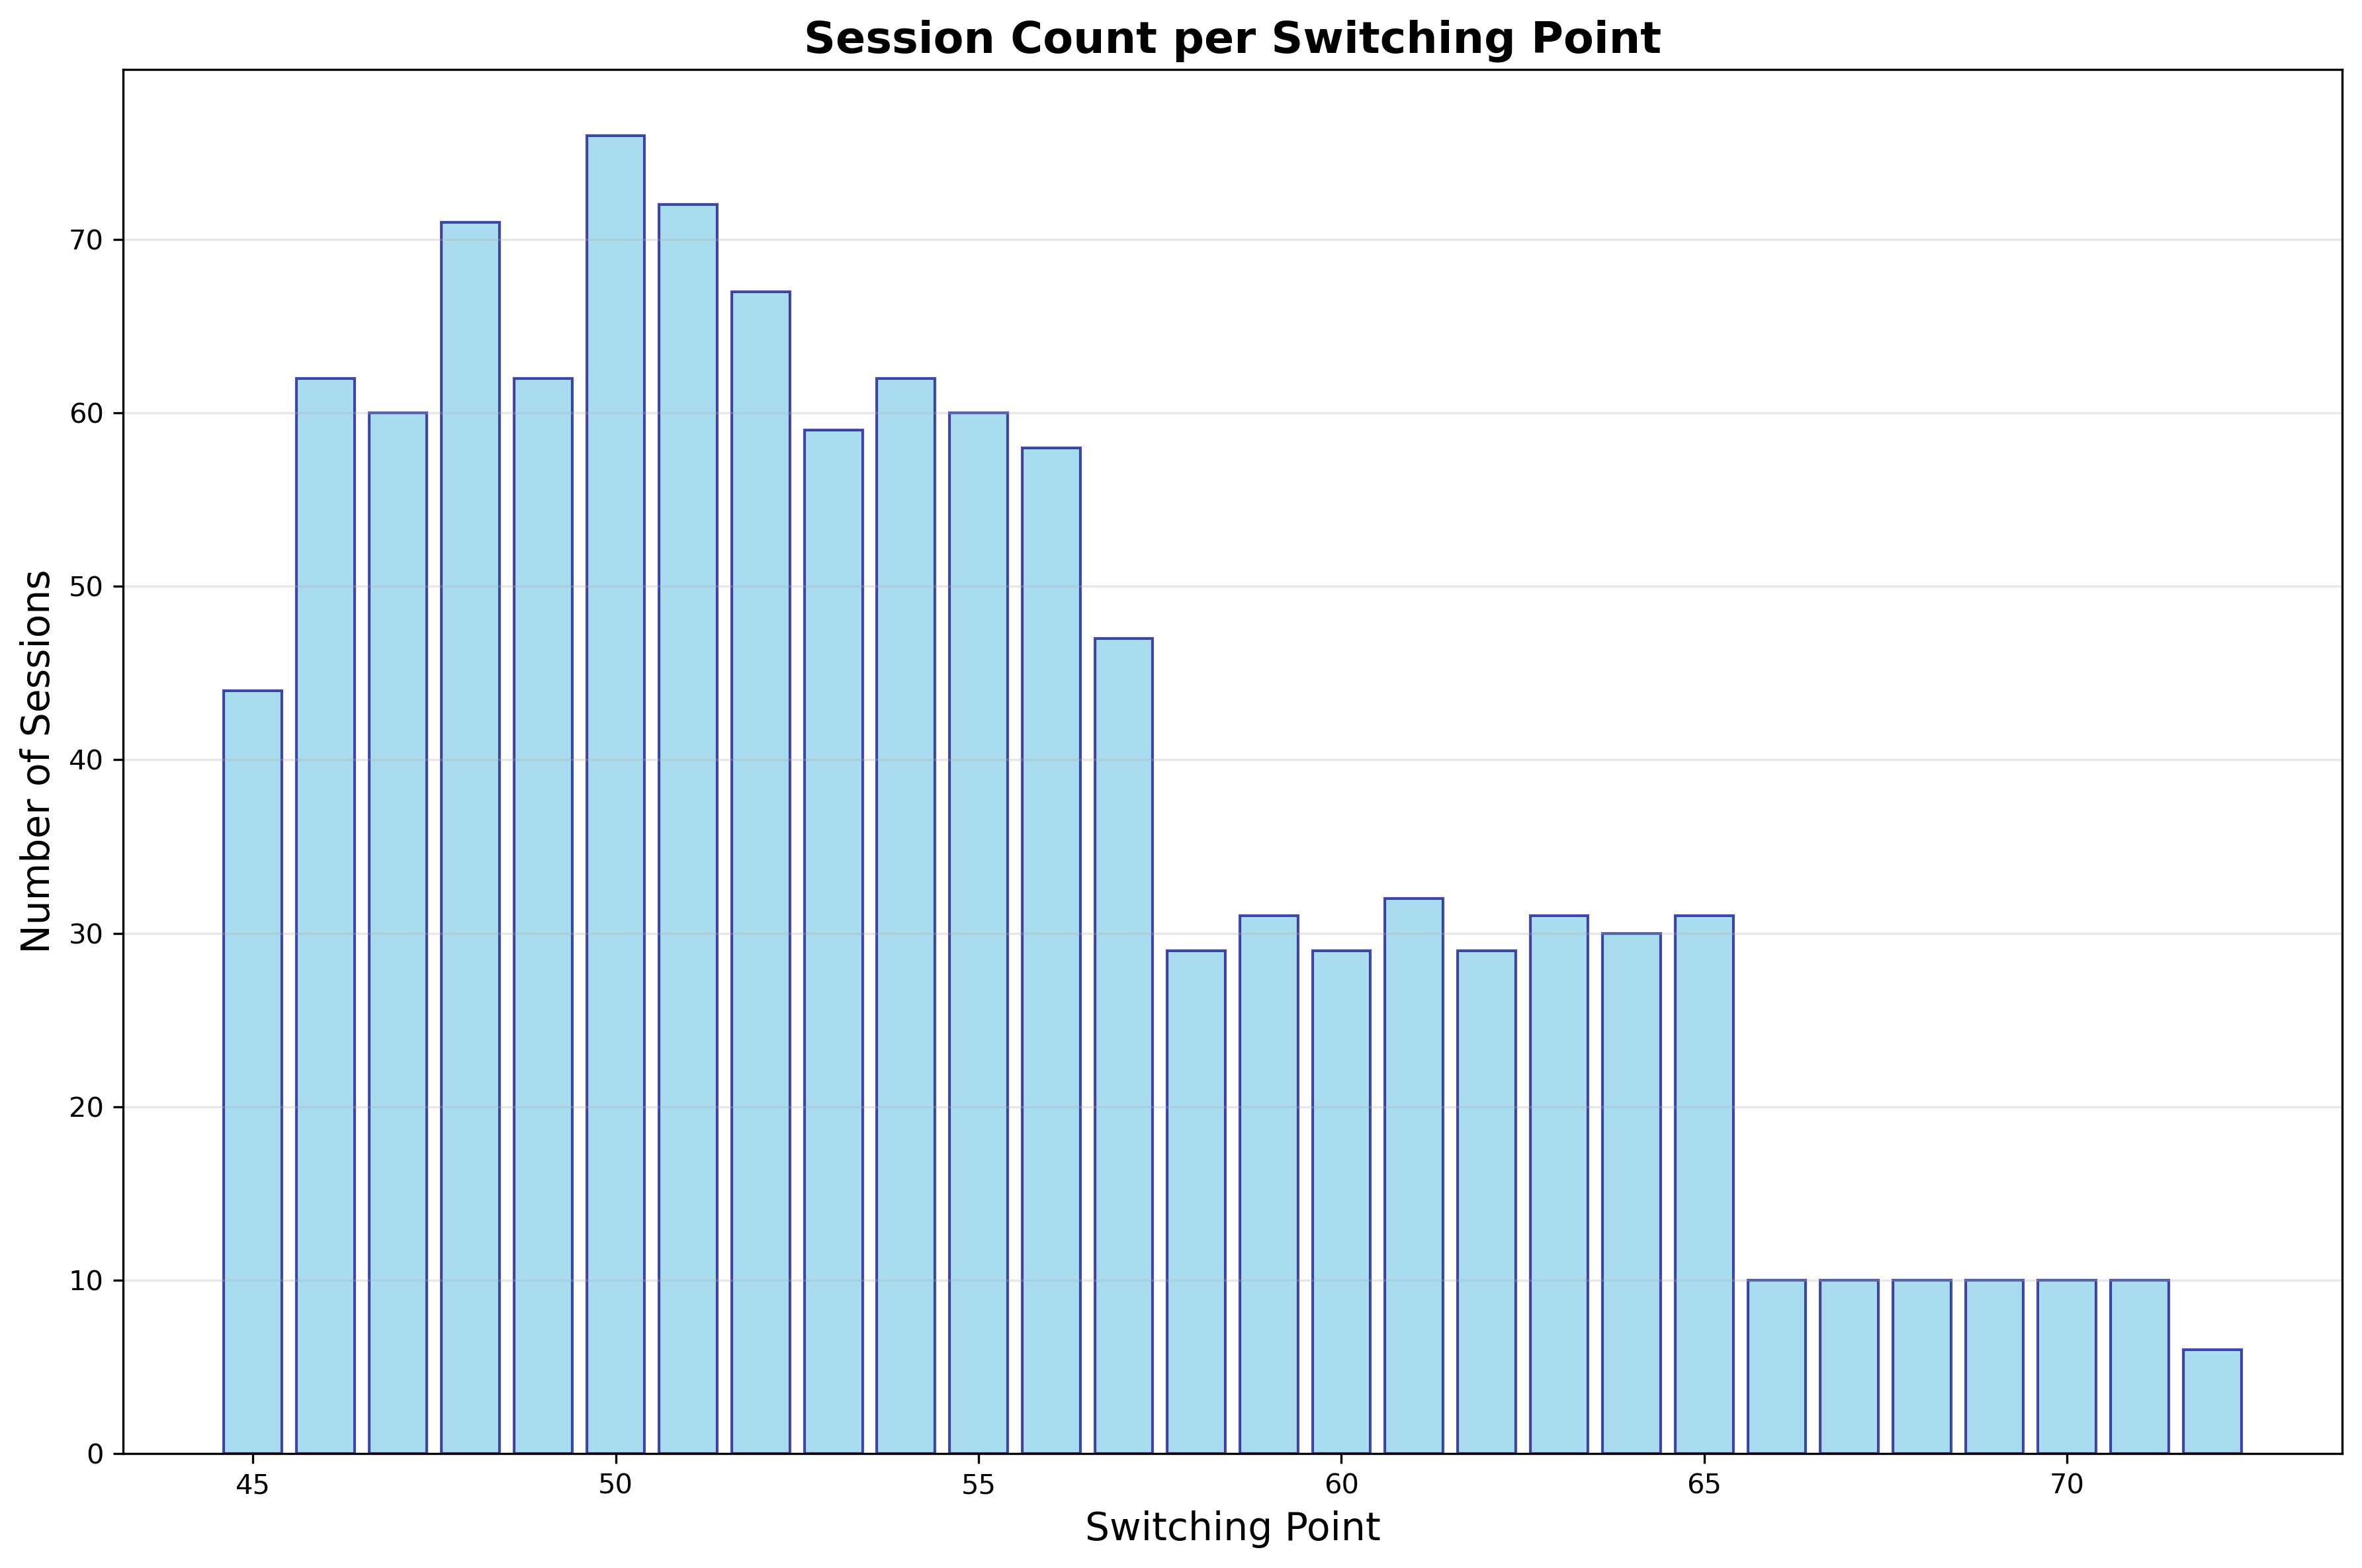

In [19]:
# Plot 1: Cluster Histogram
switch_points = [s.switch_point for s in sessions if s.switch_point is not None]

sp_counts = Counter(switch_points)
labels = sorted(sp_counts.keys())
values = [sp_counts[sp] for sp in labels]

plt.figure(figsize=(12, 8))
plt.bar(labels, values, alpha=0.7, color='skyblue', edgecolor='navy')
plt.title('Session Count per Switching Point', fontsize=16, fontweight='bold')
plt.xlabel('Switching Point', fontsize=14)
plt.ylabel('Number of Sessions', fontsize=14)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('cluster_histogram.png', dpi=300, bbox_inches='tight')
plt.show()


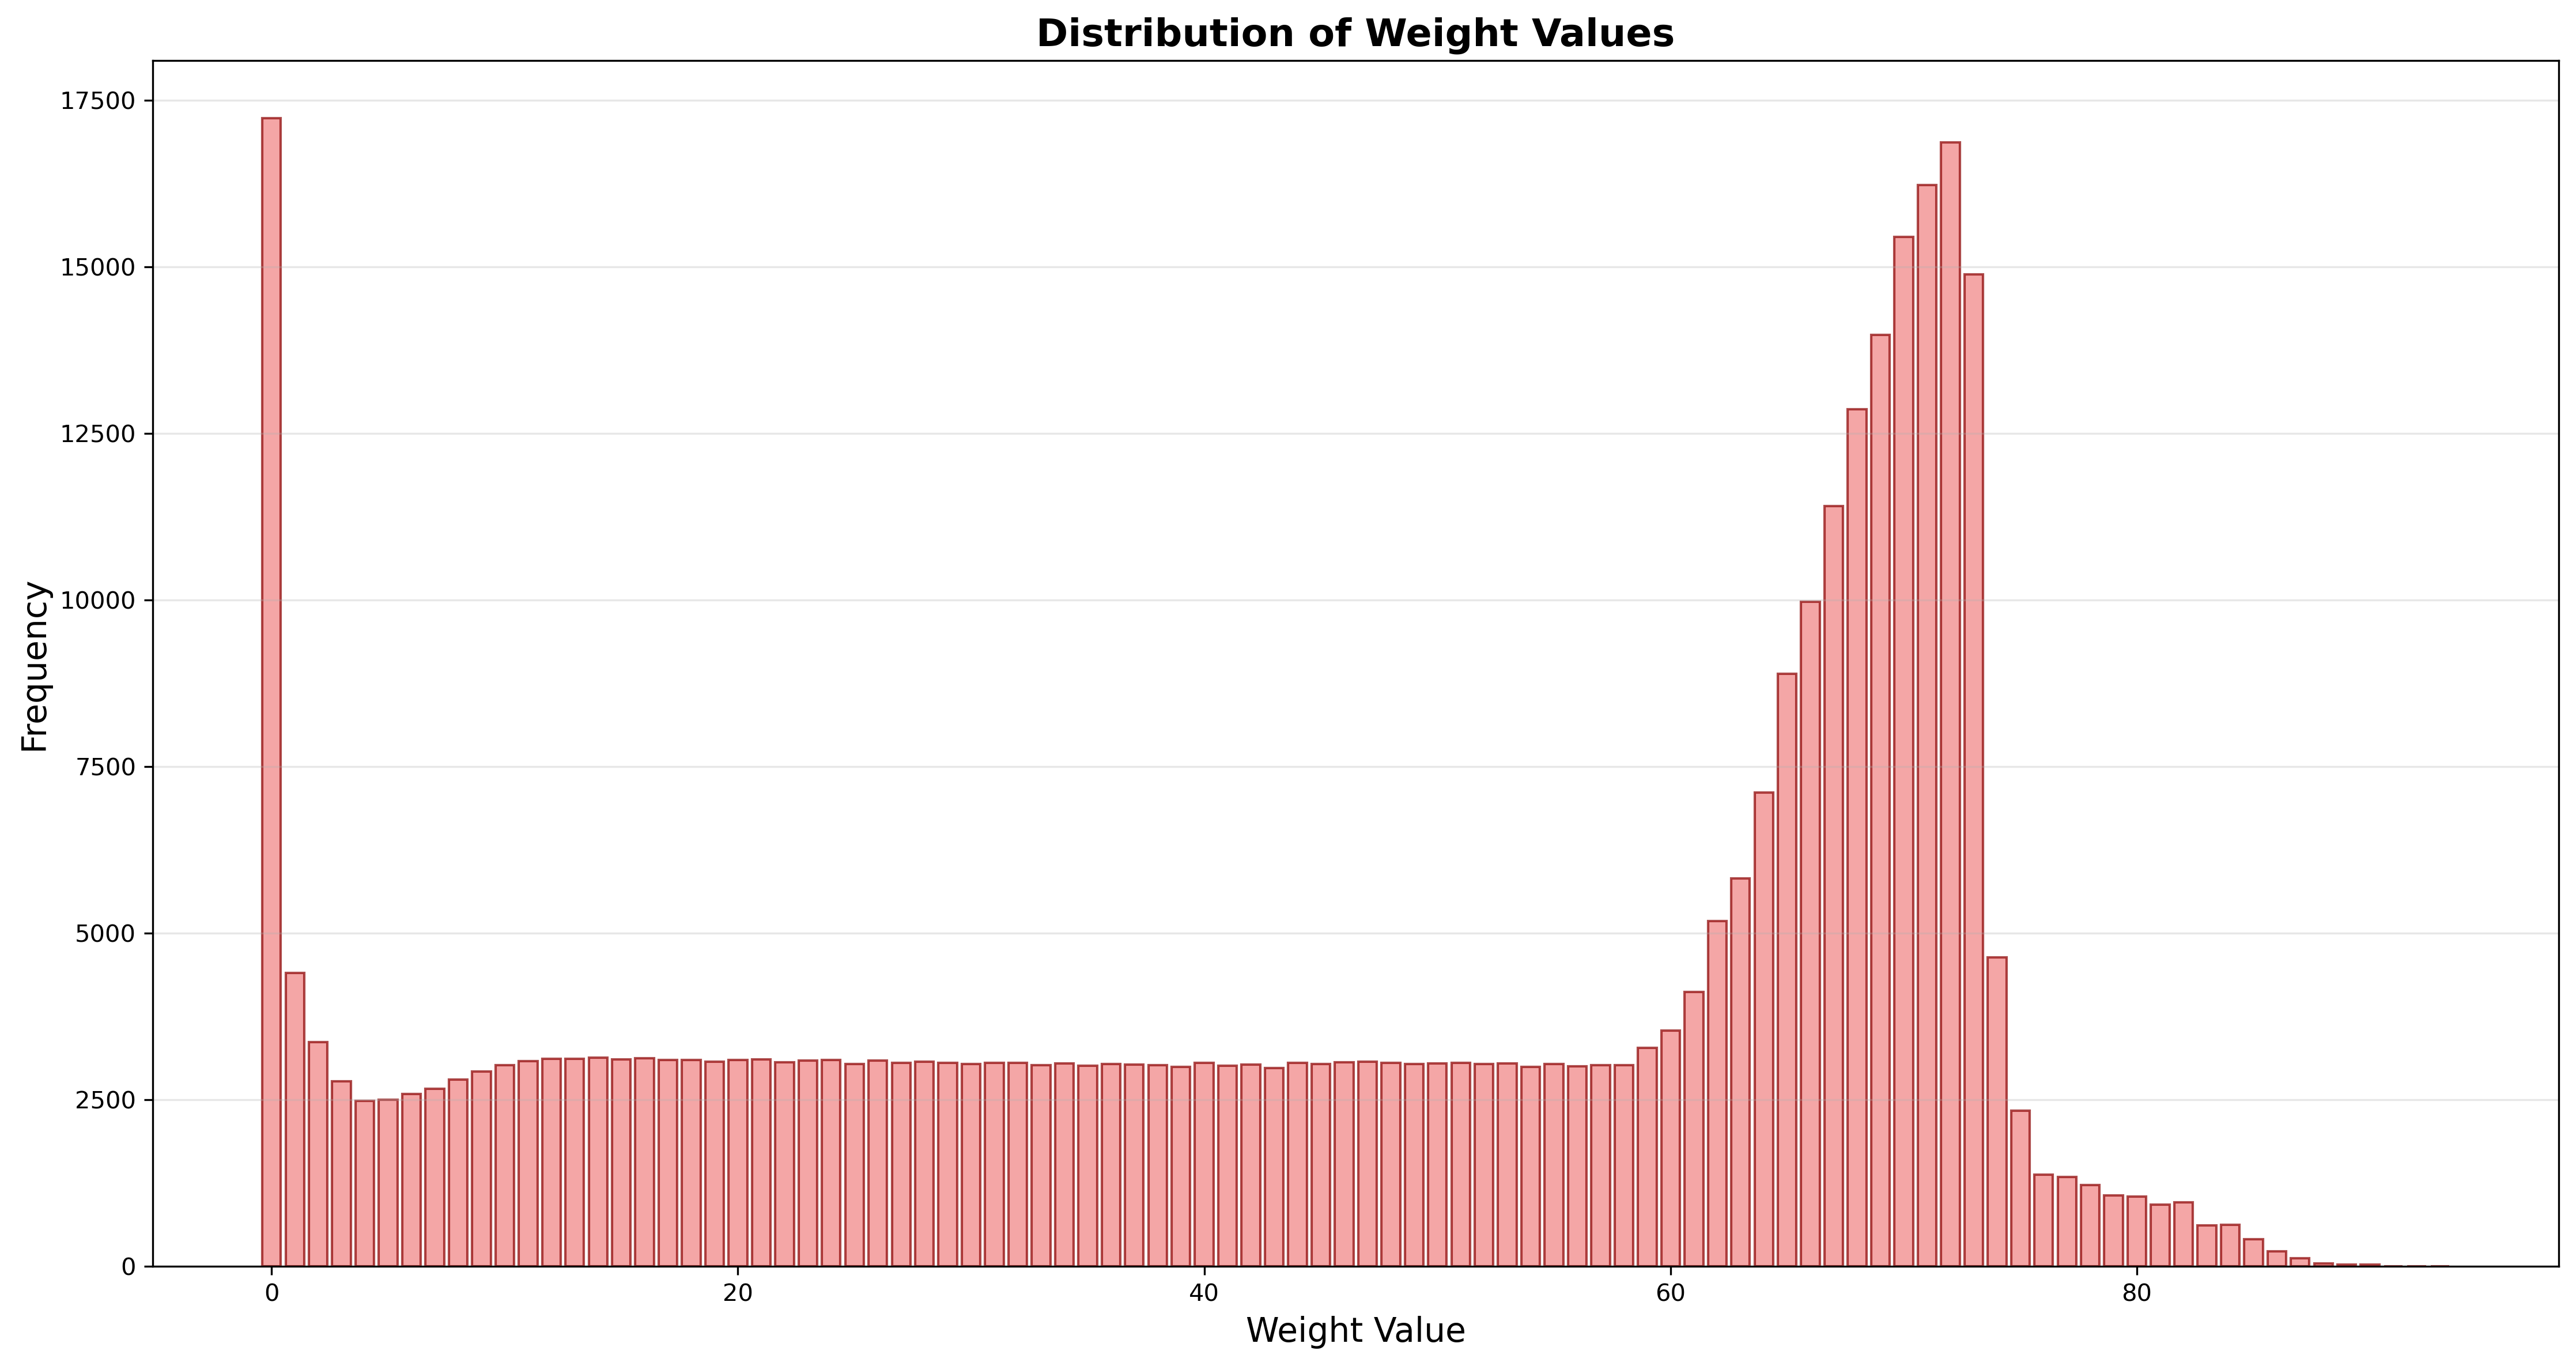

In [20]:
# Plot 2: Weight Count Histogram
all_weights = []
for session in sessions:
    for weight in session.weight_sequence:
        if weight not in (SWITCH_TOKEN, TERMINATION_TOKEN):
            all_weights.append(weight)

weight_counter = Counter(all_weights)
weights = sorted(weight_counter.keys())
counts = [weight_counter[w] for w in weights]

plt.figure(figsize=(15, 8))
plt.bar(weights, counts, alpha=0.7, color='lightcoral', edgecolor='darkred')
plt.title('Distribution of Weight Values', fontsize=16, fontweight='bold')
plt.xlabel('Weight Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('weight_count_histogram.png', dpi=300, bbox_inches='tight')
plt.show()


In [21]:
# Average episode length by switch point
lengths = defaultdict(list)
for session in sessions:
    if session.switch_point is None:
        continue
    lengths[session.switch_point].append(session.episode_length)

print('switch_point\tavg_length\tsessions')
for sp in sorted(lengths):
    runs = lengths[sp]
    avg = sum(runs) / len(runs)
    print(f'{sp}\t{avg:.2f}\t{len(runs)}')


switch_point	avg_length	sessions
45	451.73	44
46	435.40	62
47	424.45	60
48	411.34	71
49	372.65	62
50	388.97	76
51	334.14	72
52	347.99	67
53	319.56	59
54	311.10	62
55	277.00	60
56	277.16	58
57	258.77	47
58	240.76	29
59	241.77	31
60	249.24	29
61	233.19	32
62	233.14	29
63	239.48	31
64	247.23	30
65	253.26	31
66	243.50	10
67	283.50	10
68	276.20	10
69	264.30	10
70	278.50	10
71	295.70	10
72	267.17	6


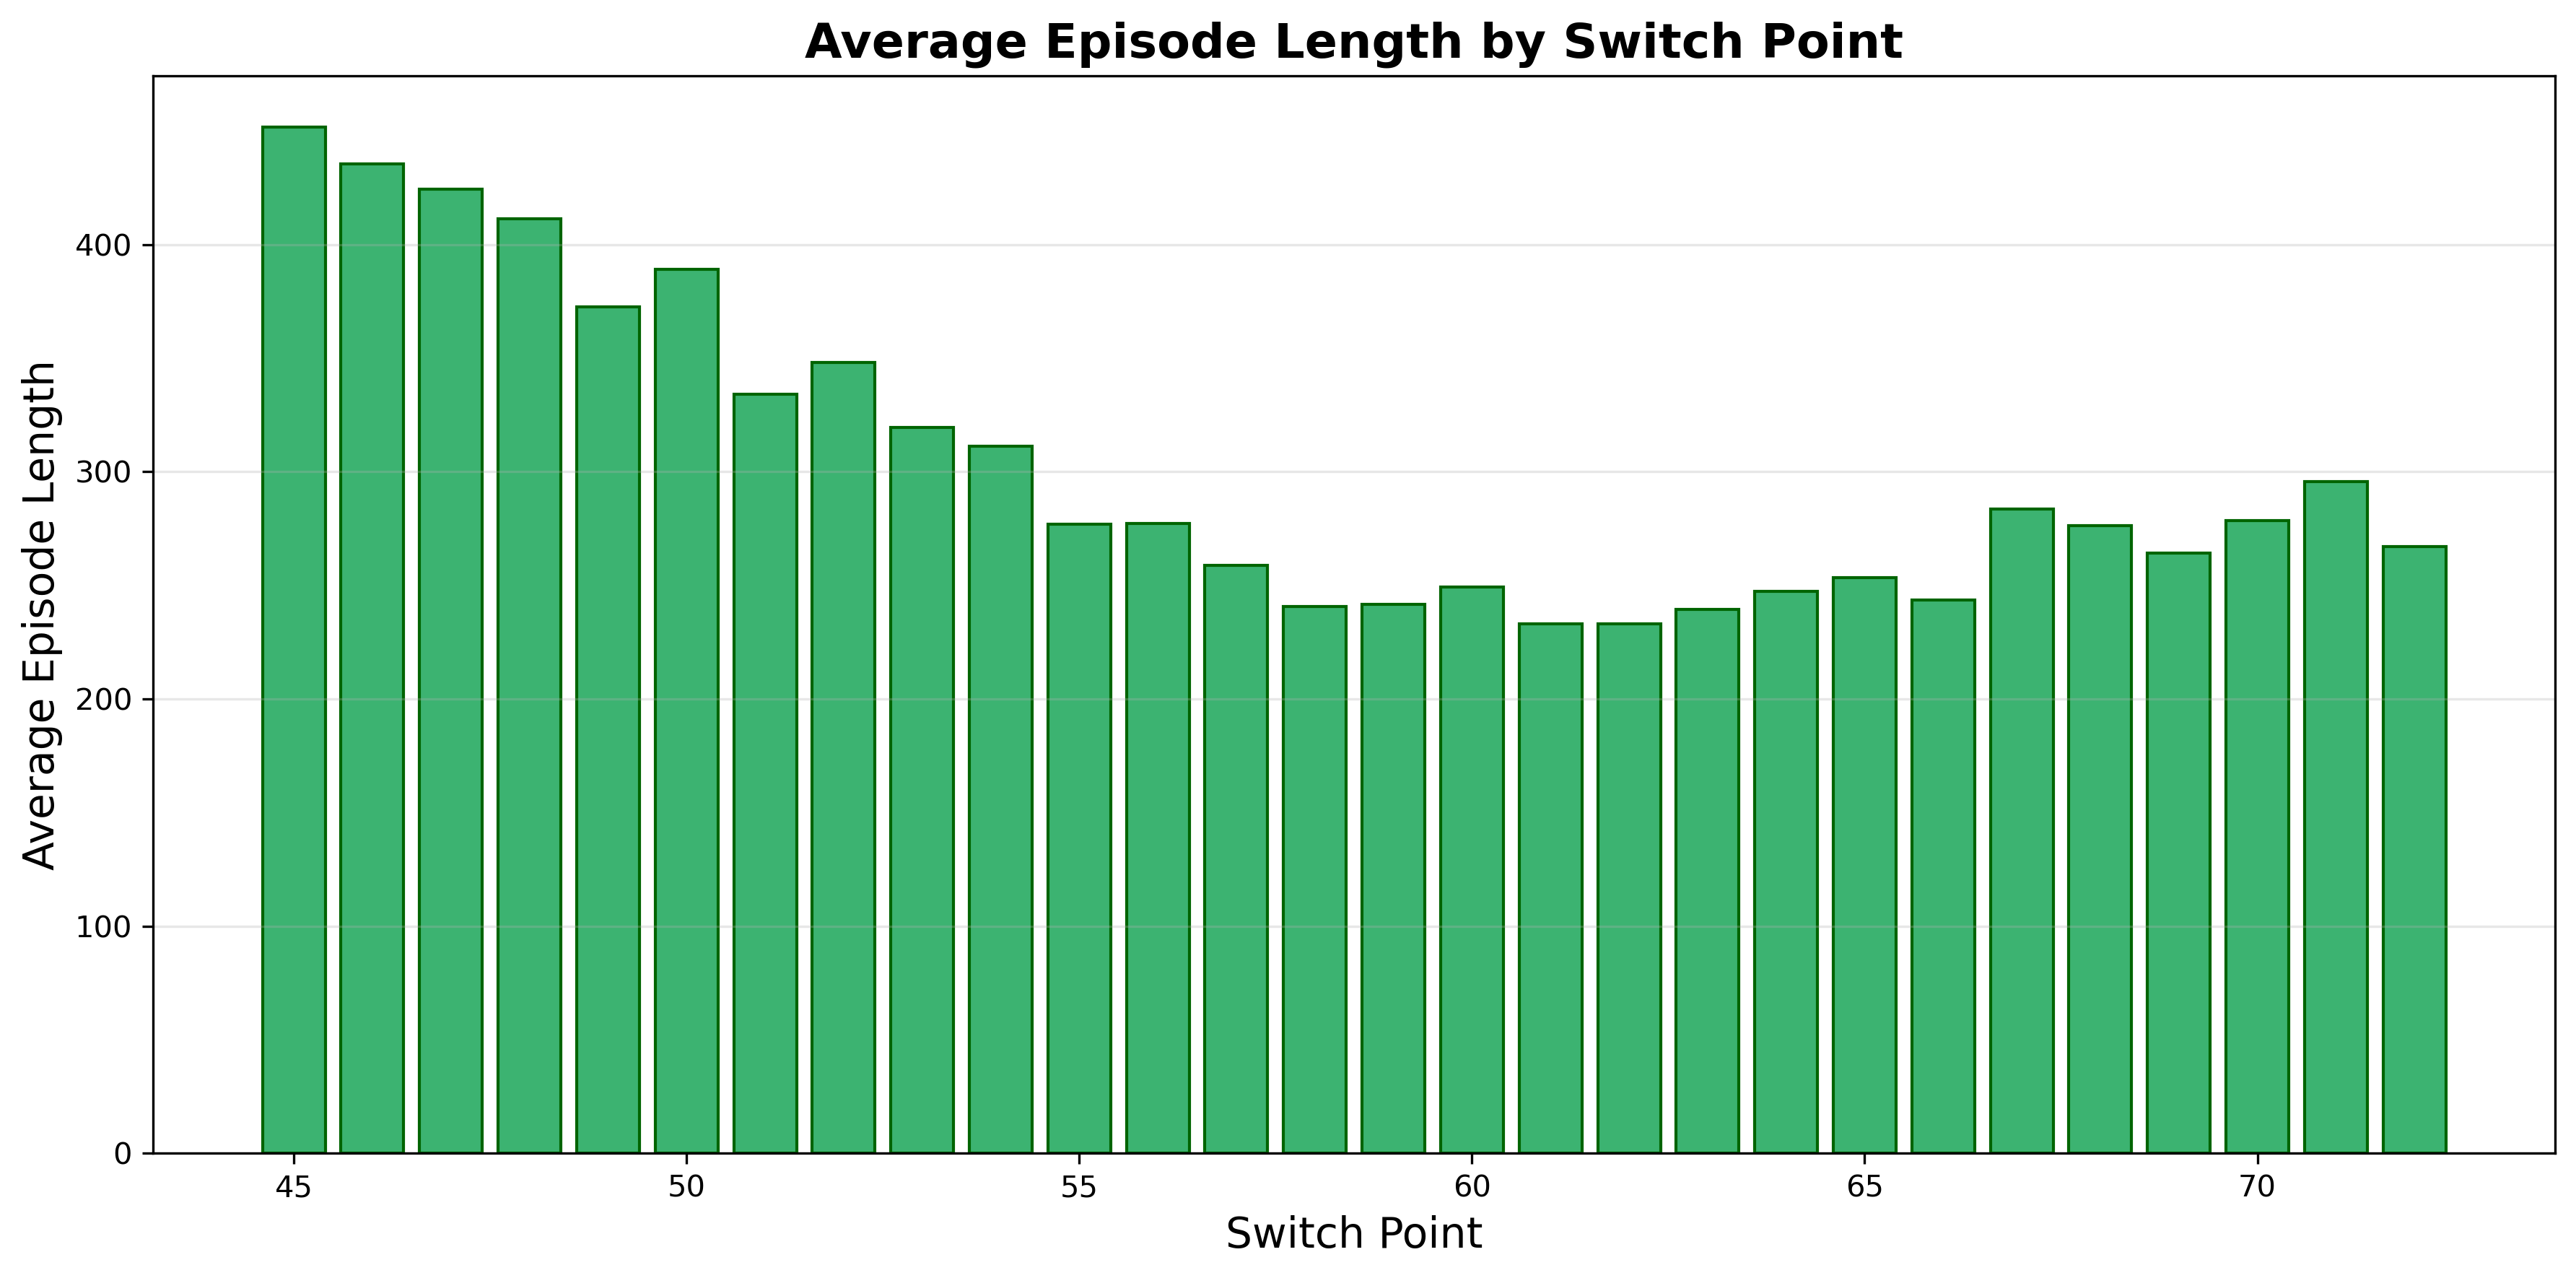

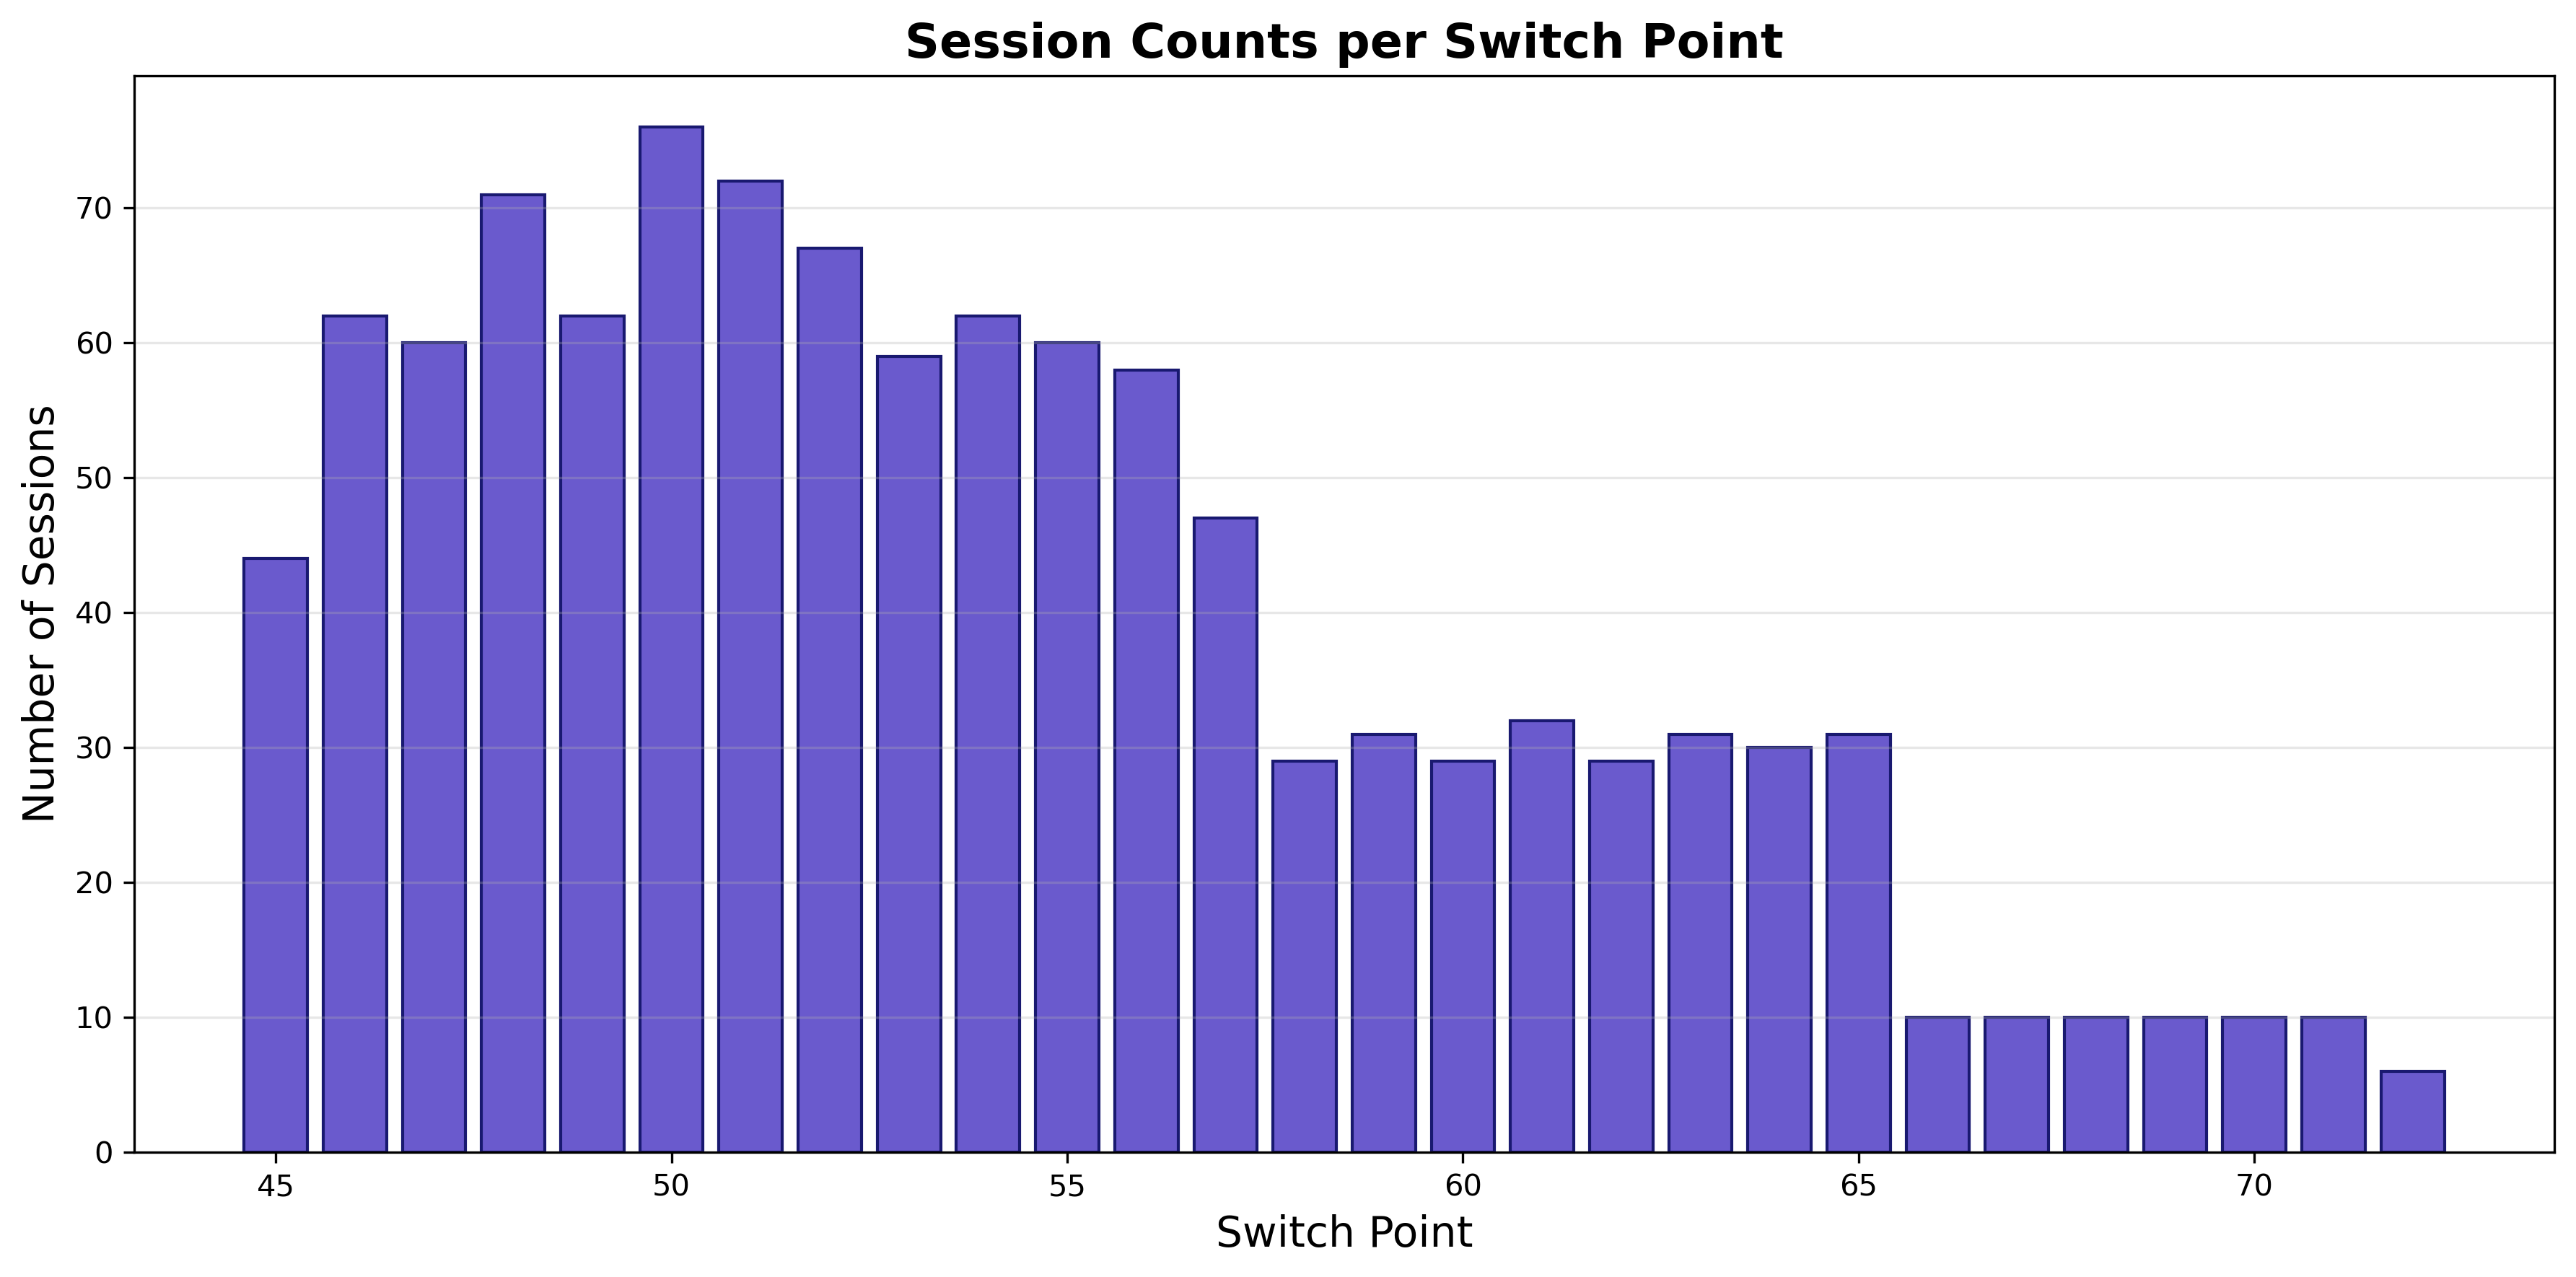

In [22]:
# Plot 3: Average episode length per switch point
avg_lengths = []
counts = []
labels = []
for sp in sorted(lengths):
    runs = lengths[sp]
    avg_lengths.append(sum(runs) / len(runs))
    counts.append(len(runs))
    labels.append(sp)

plt.figure(figsize=(12, 6))
plt.bar(labels, avg_lengths, color='mediumseagreen', edgecolor='darkgreen')
plt.title('Average Episode Length by Switch Point', fontsize=16, fontweight='bold')
plt.xlabel('Switch Point', fontsize=14)
plt.ylabel('Average Episode Length', fontsize=14)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('avg_episode_length_by_switch.png', dpi=300, bbox_inches='tight')
plt.show()

# Also plot the number of sessions contributing to each average (optional insight)
plt.figure(figsize=(12, 6))
plt.bar(labels, counts, color='slateblue', edgecolor='midnightblue')
plt.title('Session Counts per Switch Point', fontsize=16, fontweight='bold')
plt.xlabel('Switch Point', fontsize=14)
plt.ylabel('Number of Sessions', fontsize=14)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('session_counts_by_switch.png', dpi=300, bbox_inches='tight')
plt.show()
